In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [4]:
X, y = make_classification(n_samples=20, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           n_classes=2, random_state=123)

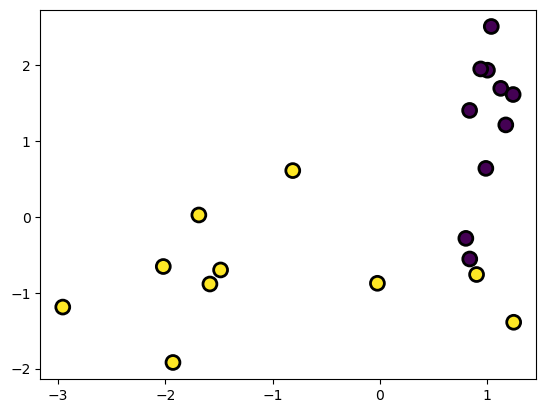

In [5]:
plt.scatter(X[:,0], X[:,1], marker='o', c=y,
            s=100, edgecolors='k', linewidths=2)
plt.show()

In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init="random", random_state=1)
model.fit(X)

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=2, random_state=1)

In [7]:
model.cluster_centers_

array([[ 1.01138251,  0.83200493],
       [-1.56258716, -0.69768199]])

In [8]:
pred = model.predict(X)
pred

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

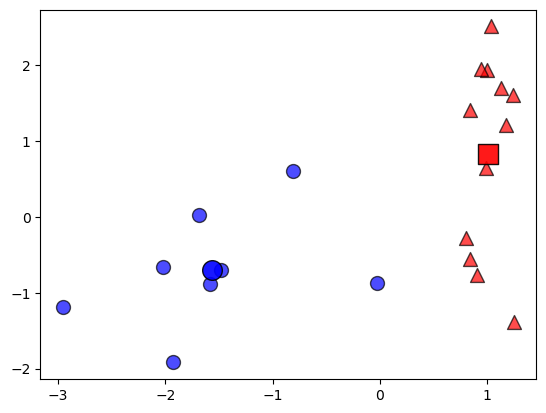

In [18]:
c0, c1 = model.cluster_centers_
plt.scatter(x=X[model.labels_==0, 0], y=X[model.labels_==0,1],
            s=100, marker='^', c='r', edgecolors='k', alpha=0.7)
plt.scatter(x=X[model.labels_==1, 0], y=X[model.labels_==1,1],
            s=100, marker='o', c='b', edgecolors='k', alpha=0.7)
plt.scatter(x=c0[0], y=c0[1],
            s=200, marker='s', c='r', edgecolors='k', alpha=0.9)
plt.scatter(x=c1[0], y=c1[1],
            s=200, c='b', marker='o', edgecolors='k', alpha=0.9)
plt.show()

In [19]:
import numpy as np
import pandas as pd

In [25]:
df = pd.DataFrame(data=np.c_[X,
                              np.linalg.norm(X-c0, axis=1),
                              np.linalg.norm(X-c1, axis=1),
                              model.labels_],
                  columns = ['X0', "X1", "d0", "d1", "class"])

In [26]:
df.head()

,X0,X1,d0,d1,class
0,1.038596,2.511754,1.679969,4.131178,0.0
1,1.002714,1.935215,1.103245,3.675992,0.0
2,-1.688105,0.025994,2.817248,0.734481,1.0
3,0.901344,-0.758966,1.594771,2.464693,0.0
4,0.836531,1.404882,0.598967,3.190070,0.0


In [31]:
def plot_cluster(model, data):
    c0, c1 = model.cluster_centers_
    plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
                s=100, marker='^', c='r', edgecolor='k', alpha=0.7)
    plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
                s=100, marker='o', c='b', edgecolor='k', alpha=0.7)
    plt.scatter(x=c0[0], y=c0[1],
                s=200, marker='s', c='r', edgecolors='k', alpha=0.9)
    plt.scatter(x=c1[0], y=c1[1],
                s=200, c='b', marker='o', edgecolors='k', alpha=0.9)

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

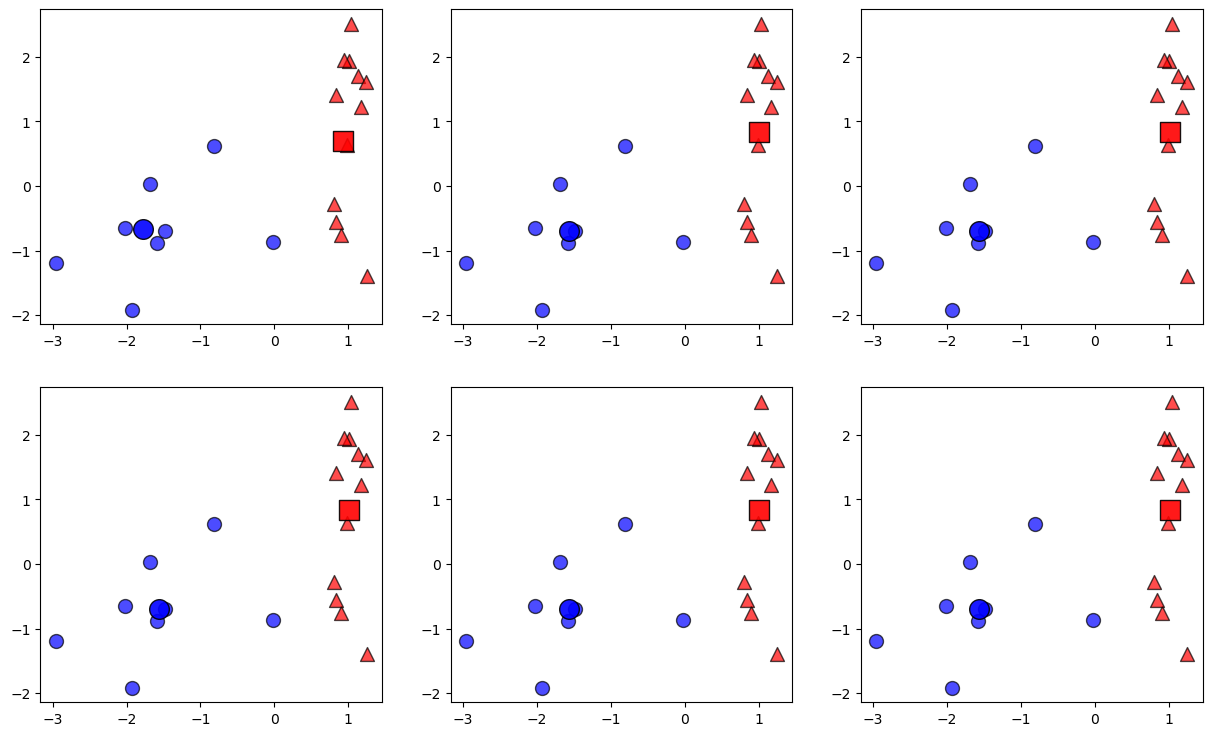

In [35]:
plt.figure(figsize=(15,9))
for i in range(6):
    model = KMeans(n_clusters=2, init="random",
                   n_init=1, max_iter=(i+1), random_state=1)
    model.fit(X)
    plt.subplot(2,3,(i+1))
    plot_cluster(model, X)

In [36]:
model = KMeans(n_clusters=2, init="random", max_iter=3, n_init=5,
               verbose=1, random_state=1)
model.fit(X)

Initialization complete
Iteration 0, inertia 56.57259566663628.
Iteration 1, inertia 28.01642744888077.
Iteration 2, inertia 27.341546526436947.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 69.40411267658162.
Iteration 1, inertia 30.217873843504016.
Iteration 2, inertia 28.08659976426305.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 35.962382115903345.
Iteration 1, inertia 27.341546526436947.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 87.43567642286382.
Iteration 1, inertia 63.65086767457875.
Iteration 2, inertia 60.583930285651874.
Initialization complete
Iteration 0, inertia 164.57748693821844.
Iteration 1, inertia 37.65606157453839.
Iteration 2, inertia 28.08659976426305.
Converged at iteration 2: strict convergence.


C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', max_iter=3, n_clusters=2, n_init=5, random_state=1,
       verbose=1)

In [37]:
model.score(X)

-27.341546526436947

In [39]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris_X = iris.iloc[:, :-1]
iris_y = iris.species
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris_X = iris.iloc[:, :-1]
iris_y = iris.species
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [48]:
from sklearn.cluster import KMeans
iris_cluster_model = KMeans(n_clusters=3, random_state=1)
iris_cluster_model.fit(iris_X)

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [49]:
iris_cluster_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [50]:
import numpy as np
pred = np.choose(iris_cluster_model.labels_, [1, 0, 2])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris.species)
pred_str = le.inverse_transform(pred)

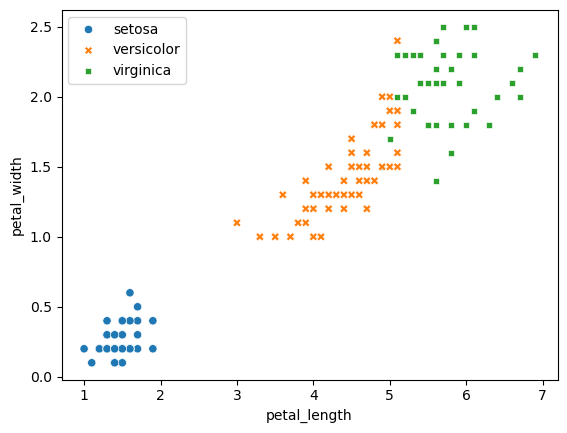

In [53]:
ax = sns.scatterplot(x="petal_length", y="petal_width", hue=pred_str,
                     style=pred_str, data=iris)

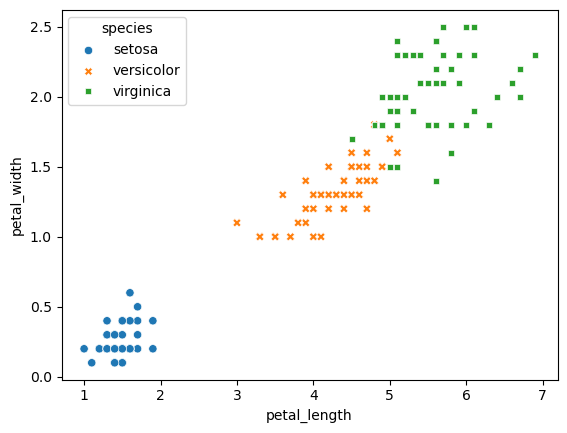

In [54]:
ax = sns.scatterplot(x="petal_length", y="petal_width", 
                     hue="species", style="species", data=iris)

In [56]:
import numpy as np
np.random.seed(0)
group0 = np.random.normal(-10, 2, (10,2))
class0 = np.full(group0.shape[0], 0)
group0 = np.c_[group0, class0]

In [57]:
group1 = np.random.normal(10, 2, (10,2))
class1 = np.full(group1.shape[0], 1)
group1 = np.c_[group1, class1]

In [58]:
group2 = np.random.normal(0, 5, (100,2))
class2 = np.full(group2.shape[0], 2)
group2 = np.c_[group2, class2]

In [59]:
data = np.r_[group0, group1, group2]

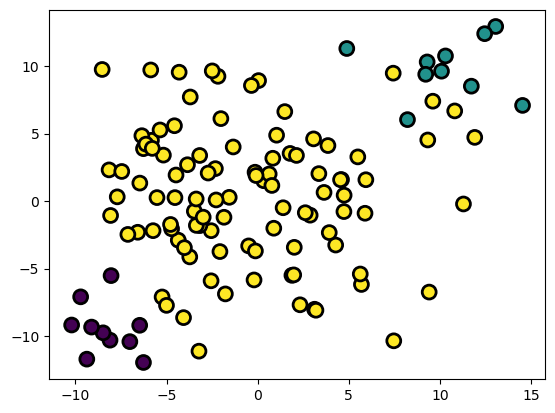

In [60]:
plt.scatter(x=data[:,0], y=data[:, 1],
            marker='o', c=data[:,2].astype(int), s=100,
            edgecolors="k", linewidths=2)
plt.show()

In [61]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init="random")
model.fit(data[:,0:2])

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3)

In [62]:
model.cluster_centers_

array([[ 7.93234415,  5.526175  ],
       [-2.11638402, -5.40013046],
       [-3.23795138,  3.79797742]])

In [63]:
pred = model.predict(data[:, 0:2])
print(pred)

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 1 2 2 1 1 1 1 2 2 0 1
 1 1 2 2 1 0 0 2 2 2 2 2 2 1 2 2 1 0 0 2 2 0 0 1 2 2 2 0 2 2 2 1 1 2 2 0 2
 1 2 1 1 1 1 2 0 2 1 0 0 1 2 1 2 1 1 1 2 2 2 1 1 0 0 1 0 1 1 1 0 1 1 2 0 1
 2 2 2 1 1 2 2 1 2]


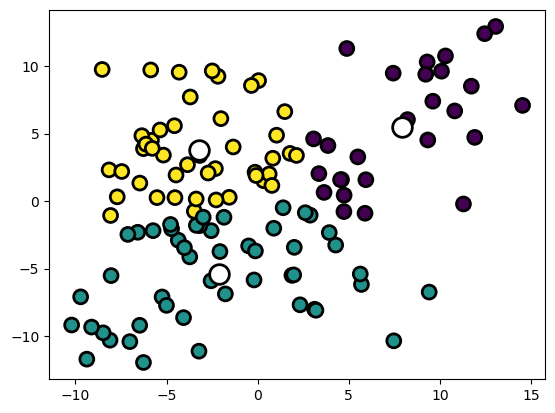

In [64]:
c = model.cluster_centers_
plt.scatter(x=data[:,0], y=data[:,1], c=pred,
            s=100, edgecolors="k", linewidths=2)
plt.scatter(x=c[:,0], y=c[:,1], s=200, c='w', edgecolors='k', linewidths=2)
plt.show()

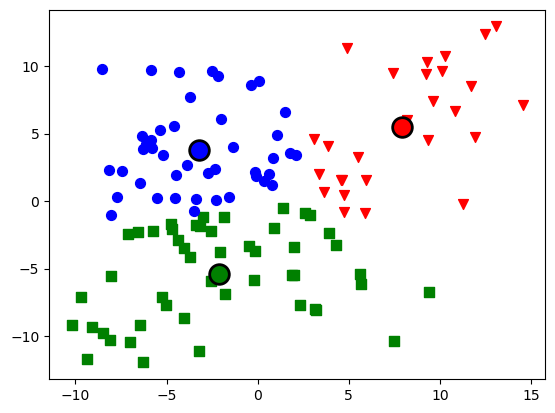

In [65]:
c0, c1, c2 = model.cluster_centers_
plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
            s=50, marker='v', c='r')
plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
            s=50, marker='s', c='g')
plt.scatter(x=data[model.labels_==2, 0], y=data[model.labels_==2, 1],
            s=50, marker='o', c='b')
plt.scatter(x=c0[0], y=c0[1], s=200, c='r', edgecolors='k', linewidths=2)
plt.scatter(x=c1[0], y=c1[1], s=200, c='g', edgecolors='k', linewidths=2)
plt.scatter(x=c2[0], y=c2[1], s=200, c='b', edgecolors='k', linewidths=2)

In [66]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6, init="random")
model.fit(data[:, 0:2])

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=6)

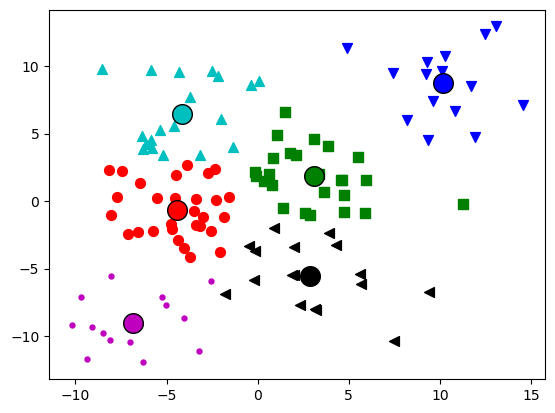

In [67]:
centers = model.cluster_centers_
colors = ['r', 'g', 'b', 'c', 'm', 'k']
markers = ['o', 's', 'v', '^', '.', '<']
for i, c in enumerate(centers):
    plt.scatter(x=data[model.labels_==i, 0], y=data[model.labels_==i, 1],
                s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200, c=colors[i], edgecolors='k')
plt.show()

In [68]:
import numpy as np
np.random.seed(0)
group0 = np.random.normal(13, 0.5, (50,2))
class0 = np.full(group0.shape[0], 0)
group0 = np.c_[group0, class0]

In [69]:
group1 = np.random.normal(10, 1.5, (50,2))
class1 = np.full(group1.shape[0], 1)
group1 = np.c_[group1, class1]

In [70]:
group2 = np.random.normal(0, 5, (50,2))
class2 = np.full(group2.shape[0], 2)
group2 = np.c_[group2, class2]

In [71]:
data = np.r_[group0, group1, group2]

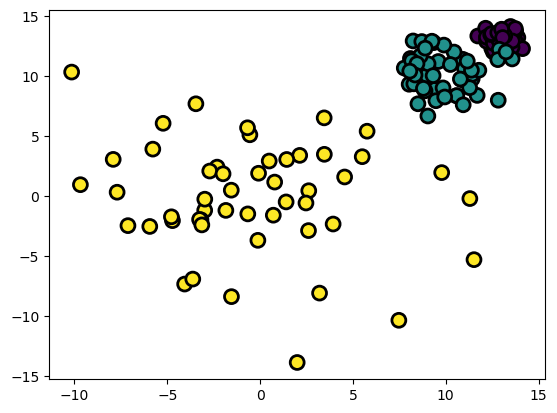

In [72]:
import matplotlib.pyplot as plt
plt.scatter(x=data[:, 0], y=data[:, 1],
            marker='o', c= data[:, 2].astype(int), s=100,
            edgecolors="k", linewidths=2)
plt.show()

In [73]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init="random")
model.fit(data[:, 0:2])

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3)

In [74]:
pred = model.predict(data[:, 0:2])
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 2 2 1 2
 2 2 1 2 2 2 2 1 1 2 2 1 1 2 1 1 1 2 2 2 2 2 1 2 1 1 2 1 2 2 2 1 2 1 2 1 2
 2 2]


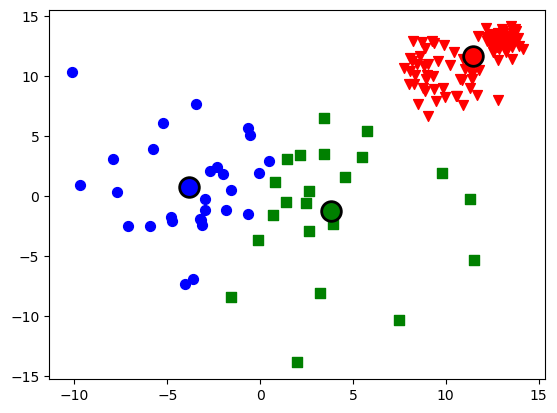

In [75]:
c0, c1, c2 = model.cluster_centers_
plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
            s=50, marker='v', c='r')
plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
            s=50, marker='s', c='g')
plt.scatter(x=data[model.labels_==2, 0], y=data[model.labels_==2, 1],
            s=50, marker='o', c='b')
plt.scatter(x=c0[0], y=c0[1], s=200, c='r', edgecolors='k', linewidths=2)
plt.scatter(x=c1[0], y=c1[1], s=200, c='g', edgecolors='k', linewidths=2)
plt.scatter(x=c2[0], y=c2[1], s=200, c='b', edgecolors='k', linewidths=2)

plt.show()

In [76]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, init="random")
model.fit(data[:, 0:2])

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=5)

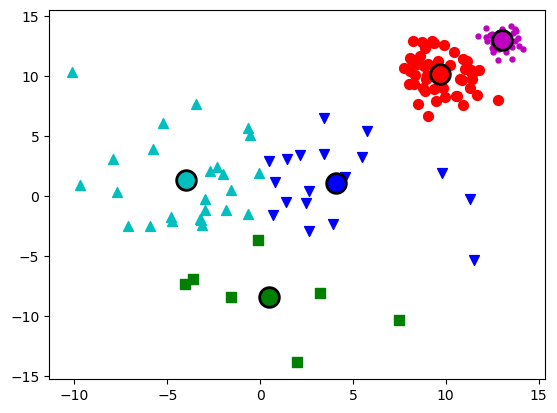

In [77]:
centers = model.cluster_centers_
colors = ['r', 'g', 'b', 'c', 'm']
markers = ['o', 's', 'v', '^', '.']
for i, c in enumerate(centers):
    plt.scatter(x=data[model.labels_==i, 0], y=data[model.labels_==i, 1],
                s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200, c=colors[i], edgecolors='k', linewidths=2)
plt.show()

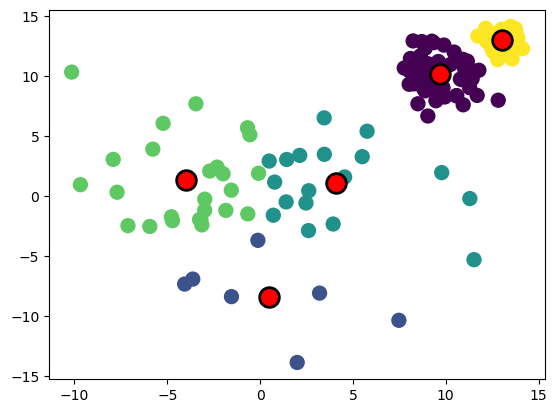

In [79]:
pred = model.predict(data[:, 0:2])
c = model.cluster_centers_
plt.scatter(x=data[:,0], y=data[:,1], c=pred, s=100)
plt.scatter(x=c[:,0], y=c[:,1], s=200, c='r', edgecolor='k', linewidth=2)
plt.show()

In [81]:
import numpy as np
np.random.seed(0)
X1 = np.random.rand(200)*3
noise = np.random.normal(0, 0.2, X1.shape)
Y1 = np.sin(X1) + noise

X2 = X1 + 1.5
Y2 = np.cos(X2) + noise

group1 = np.c_[X1, Y1, np.full(X1.shape[0], 0)]
group2 = np.c_[X2, Y2, np.full(X2.shape[0], 1)]
data = np.r_[group1, group2]

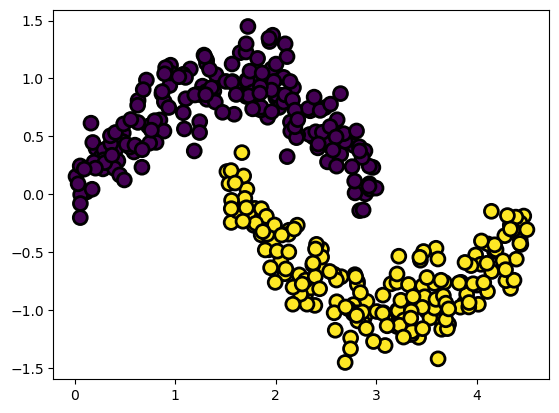

In [82]:
import matplotlib.pyplot as plt
plt.scatter(x=data[:, 0], y=data[:, 1], marker='o',
            c=data[:, 2].astype(int),
            s=100, edgecolors='k', linewidths=2)
plt.show()

In [83]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init="random")
model.fit(data[:, 0:2])

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=2)

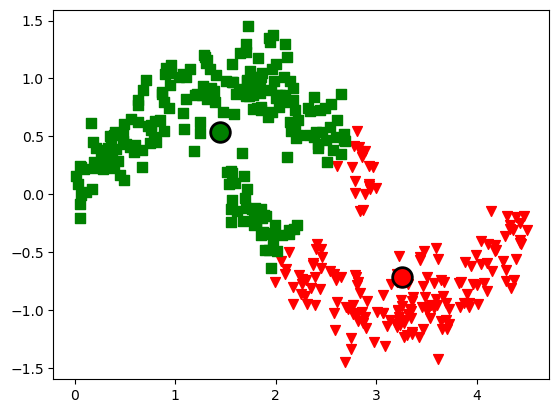

In [84]:
c0, c1 = model.cluster_centers_
plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
            s=50, marker='v', c='r')
plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
            s=50, marker='s', c='g')
plt.scatter(x=c0[0], y=c0[1], s=200, c='r', edgecolors='k', linewidths=2)
plt.scatter(x=c1[0], y=c1[1], s=200, c='g', edgecolors='k', linewidths=2)
plt.show()

In [85]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7, init="random", random_state=2)
model.fit(data[:, 0:2])

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=7, random_state=2)

In [86]:
center = model.cluster_centers_
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
markers = ['o', 's', 'v', '^', '.', '*', '<']

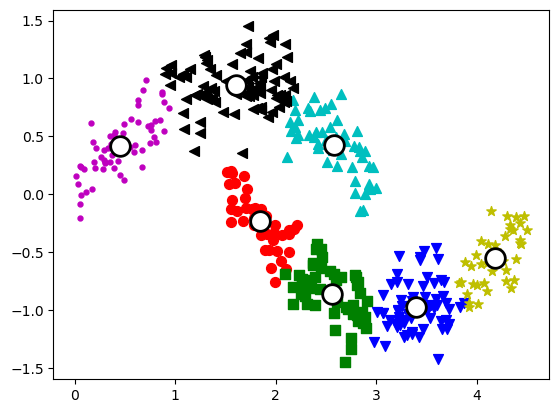

In [88]:
for i, c in enumerate(center):
    plt.scatter(x=data[model.labels_==i, 0], y=data[model.labels_==i, 1],
                s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200, c='w', edgecolors='k', linewidths=2)
plt.show()

In [89]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    model = KMeans(n_clusters=n_clusters, random_state=2)
    cluster_labels = model.fit_predict(data[:, :-1])
    score = silhouette_score(data[:, :-1], cluster_labels)
    print(f"클러스터 수 : {n_clusters}, 실루엣 계수: {score}")

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


클러스터 수 : 2, 실루엣 계수: 0.533235774308134


C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


클러스터 수 : 3, 실루엣 계수: 0.4701230677079941


C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


클러스터 수 : 4, 실루엣 계수: 0.4732502498237369


C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


클러스터 수 : 5, 실루엣 계수: 0.45962085906799105


C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


클러스터 수 : 6, 실루엣 계수: 0.49827095148830175


C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


클러스터 수 : 7, 실루엣 계수: 0.5027363876263838


C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


클러스터 수 : 8, 실루엣 계수: 0.4918697936848558


C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


클러스터 수 : 9, 실루엣 계수: 0.47303667875323785


C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


클러스터 수 : 10, 실루엣 계수: 0.4504109748038108


In [90]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris.species)
iris.species = le.transform(iris.species)

In [92]:
from scipy.cluster.hierarchy import linkage
cluster_model = linkage(iris, method="complete")

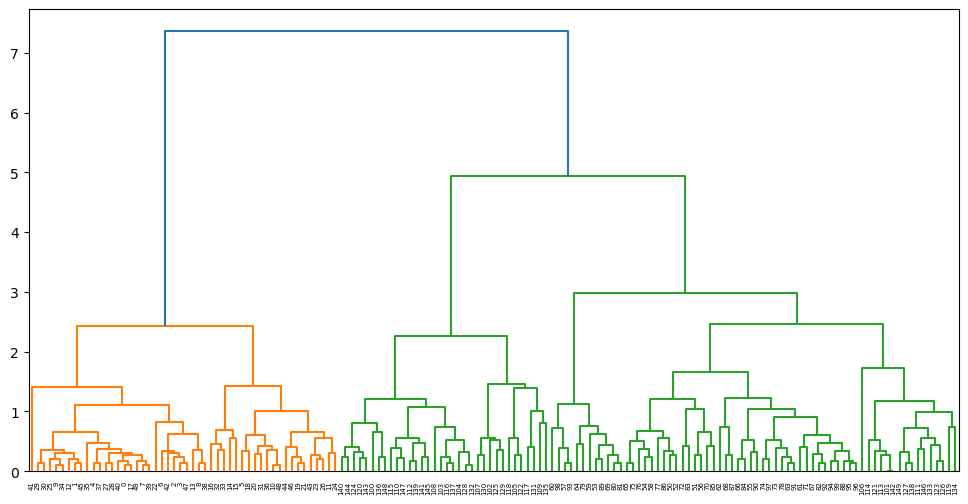

In [93]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(12,6))
dendrogram(cluster_model, labels=iris.index)
plt.show()

In [94]:
from scipy.cluster.hierarchy import linkage
cluster_model = linkage(iris, method="complete")

In [95]:
from scipy.cluster.hierarchy import fcluster
fcluster(cluster_model, 4, criterion="distance")

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [96]:
fcluster(cluster_model, 2, criterion="distance")

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 3, 7, 4, 3, 3, 4, 7, 4, 3, 4,
       3, 7, 3, 7, 7, 3, 3, 4, 4, 7, 3, 7, 4, 7, 3, 4, 7, 7, 3, 4, 4, 4,
       3, 7, 7, 4, 3, 3, 7, 3, 3, 3, 7, 3, 3, 3, 7, 3, 3, 7], dtype=int32)

In [97]:
from scipy.cluster.hierarchy import fcluster
predict = fcluster(cluster_model, 4, criterion="distance")

In [98]:
import numpy as np
adjusted_pred = np.choose((predict-1), [0, 2, 1])
adjusted_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [99]:
import pandas as pd
pred_name = le.inverse_transform(adjusted_pred)
origin_name = le.inverse_transform(iris.species.values)
pd.crosstab(origin_name, pred_name,
            rownames=["True"], colnames=["Predicted"], margins=True)

Predicted,setosa,versicolor,virginica,All
True,,,,
setosa,50,0,0,50
versicolor,0,50,0,50
virginica,0,16,34,50
All,50,66,34,150


<Axes: xlabel='petal_length', ylabel='petal_width'>

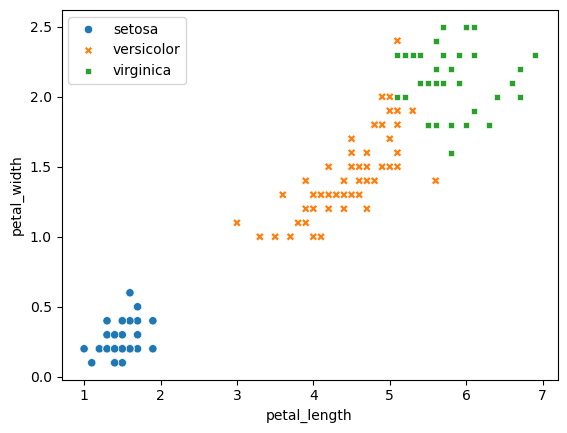

In [100]:
sns.scatterplot(x="petal_length", y="petal_width", data=iris,
                hue=pred_name, style=pred_name)

In [101]:
import numpy as np

X1 = np.random.rand(200)*3
noise = np.random.normal(0, 0.2, X1.shape)
Y1 = np.sin(X1)+noise

X2 = X1 + 1.5
Y2 = np.cos(X2) + noise
group1 = np.c_[X1, Y1, np.full(X1.shape[0], 0)]
group2 = np.c_[X2, Y2, np.full(X2.shape[0], 0)]
data = np.r_[group1, group2]

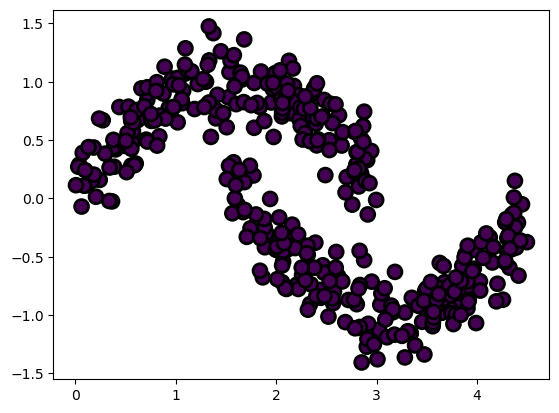

In [102]:
import matplotlib.pyplot as plt

plt.scatter(x=data[:,0], y=data[:, 1],
            marker='o', c=data[:,2].astype(int),
            s=100, edgecolor='k', linewidth=2)
plt.show()

In [103]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10)
db.fit(data[:, 0:2])

DBSCAN(eps=0.3, min_samples=10)

In [107]:
labels = db.labels_
n_clusters_ = len(set(labels)) - ( 1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

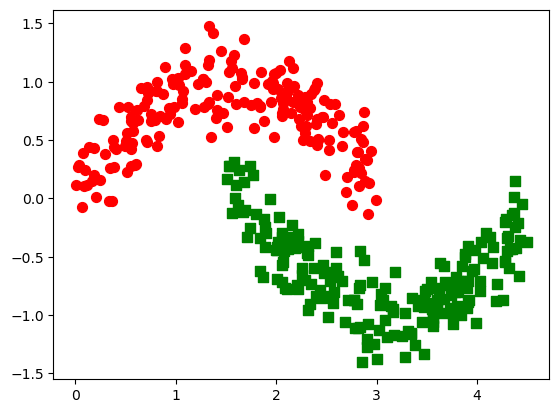

In [108]:
import matplotlib.pyplot as plt

colors = ['r', 'g']
markers = ['o', 's']
for i in range(n_clusters_):
    plt.scatter(x=data[db.labels_==i, 0], y=data[db.labels_==i, 1],
                s=50, marker=markers[i], c=colors[i])

plt.scatter(x=data[db.labels_==-1,0], y=data[db.labels_==-1,1],
            s=50, marker='x', c='b')
plt.show()

In [123]:
data[db.labels_==-1,0]

array([], dtype=float64)

In [124]:
y=data[db.labels_==-1,1]

In [110]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [111]:
def rand_index(y_true, y_pred):
    n = len(y_true)
    a, b = 0, 0
    for i in range(n):
        for j in range(i+1, n):
            if (y_true[i] == y_true[j]) & (y_pred[i] == y_pred[j]):
                a += 1
            elif (y_true[i] != y_true[j]) & (y_pred[i] != y_pred[j]):
                b += 1
            else:
                pass
    RI = (a + b) / (n * (n-1) / 2)
    return RI

In [112]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris_X = iris.iloc[:, :-1]
iris_y = iris.species

In [114]:
from sklearn.cluster import KMeans
iris_cluster_model = KMeans(n_clusters=3, random_state=1)
iris_cluster_model.fit(iris_X)

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [115]:
import numpy as np
pred = np.choose(iris_cluster_model.labels_, [1, 0, 2])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris.species)
predict = le.inverse_transform(pred)

In [117]:
rand_index(y_true=iris.species, y_pred=predict)

0.8797315436241611

In [118]:
iris_cluster_model = KMeans(n_clusters=2, random_state=1)
iris_cluster_model.fit(iris_X)

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=1)

In [119]:
iris_cluster_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [120]:
y_true = [1]*50 + [0]*100
rand_index(y_true, iris_cluster_model.labels_)

0.9605369127516779

In [121]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(labels_true=iris.species, labels_pred=predict)

0.7302382722834697

In [122]:
from sklearn.metrics import adjusted_mutual_info_score
adjusted_mutual_info_score(labels_true=iris.species,
                           labels_pred=predict)

0.7551191675800483

In [125]:
from sklearn.metrics import fowlkes_mallows_score
fowlkes_mallows_score(labels_true=iris.species,
                      labels_pred=predict)

0.8208080729114153

In [126]:
from sklearn.metrics import homogeneity_score
homogeneity_score(labels_true=iris.species, labels_pred=predict)

0.7514854021988338

In [127]:
from sklearn.metrics import completeness_score
completeness_score(labels_true=iris.species, labels_pred=predict)

0.7649861514489815

In [128]:
from sklearn.metrics import v_measure_score
v_measure_score(labels_true=iris.species, labels_pred=predict)

0.7581756800057784

In [129]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [130]:
import seaborn as sns

In [131]:
iris = sns.load_dataset("iris")
iris_X = iris.loc[:, ["petal_length", "petal_width"]]

In [132]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7653904101258123


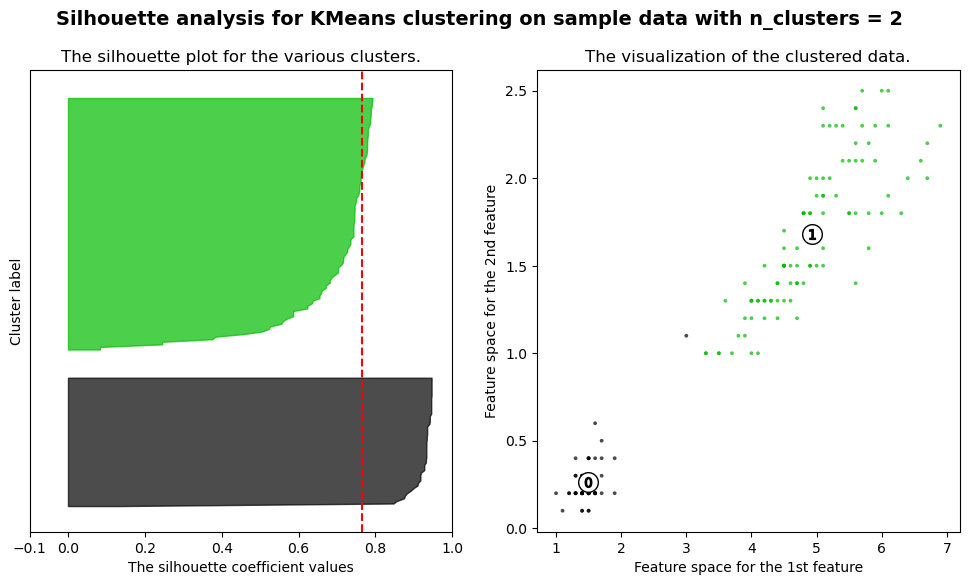

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.6604800083974887


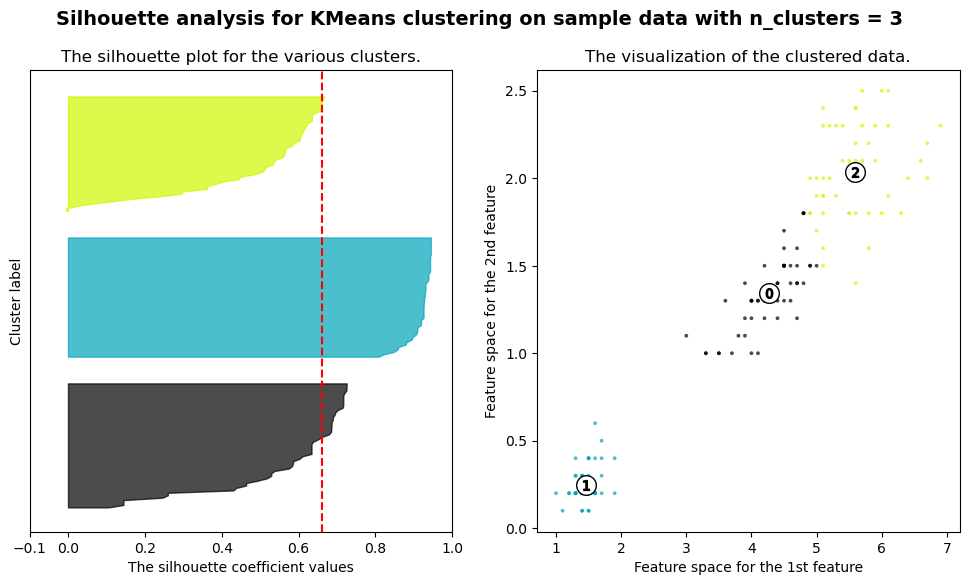

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6127580794464402


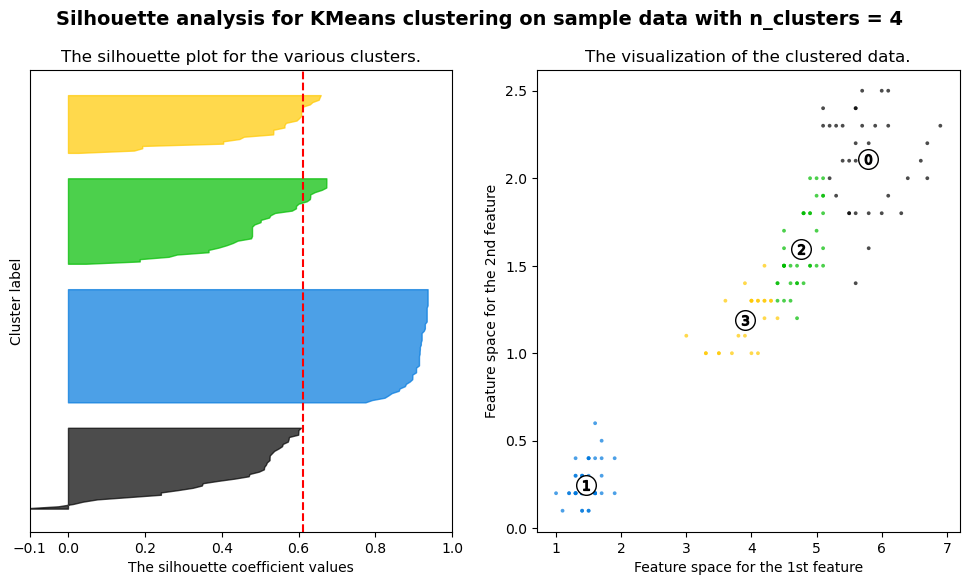

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.5883732712110276


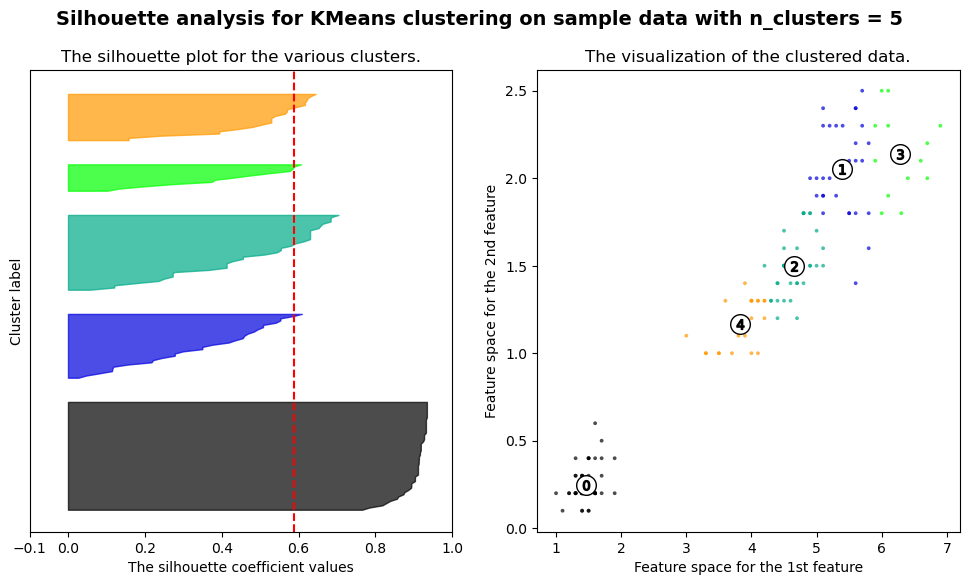

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.5769601940397073


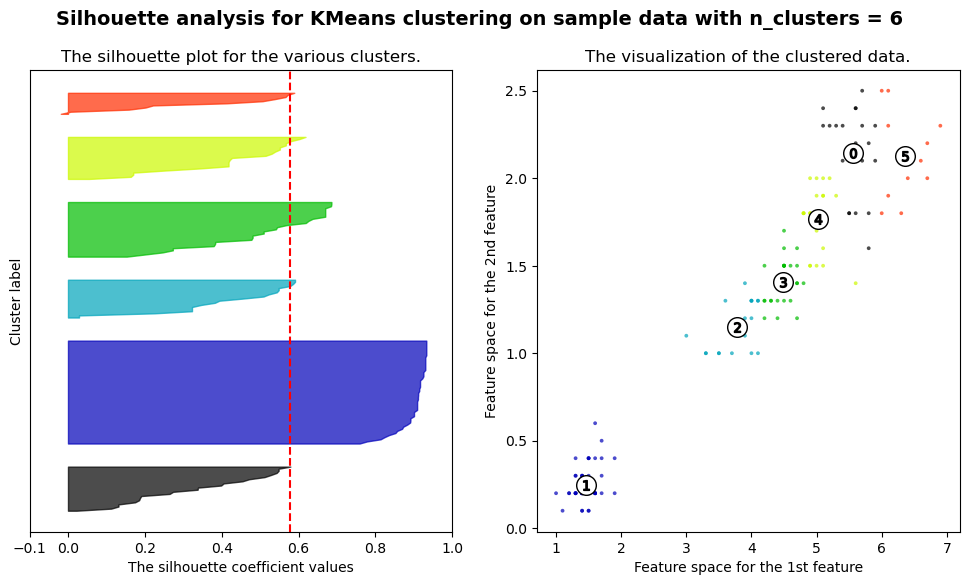

In [139]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 6)

    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0, len(iris_X) + (n_clusters + 1) * 10])

    model = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = model.fit_predict(iris_X)

    silhouette_avg = silhouette_score(iris_X, cluster_labels)
    print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(iris_X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1],
                marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = model.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % n_clusters),
                    fontsize=14, fontweight='bold')
    plt.show()

In [140]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
X = iris.loc[:, ["petal_length", "petal_width"]]
x1 = iris.petal_length
x2 = iris.petal_width

In [141]:
distortions = []
K = range(1, 10)
for k in K:
    kmeans_model = KMeans(n_clusters=k).fit(X)
    kmeans_model.fit(X)
    euc_dist = cdist(X, kmeans_model.cluster_centers_, 'euclidean')
    distortion = sum(np.min(euc_dist, axis=1)) / X.shape[0]
    distortions.append(distortion)

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

In [142]:
! pip install kneed

In [143]:
from kneed import KneeLocator
kn = KneeLocator(list(K), distortions,
                 curve='convex', direction='decreasing')

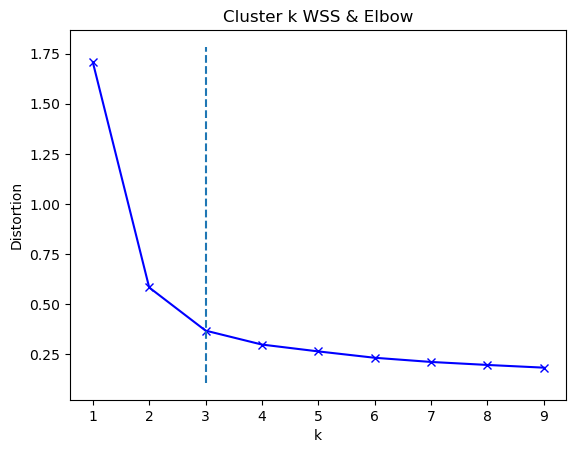

In [145]:
plt.plot(K, distortions, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Cluster k WSS & Elbow')
plt.show()

In [146]:
import seaborn as sns
iris = sns.load_dataset("iris")

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score

In [147]:
ch_score = []
data = iris.iloc[:, :-1]
for i in range(2, 6):
    clustering = AgglomerativeClustering(n_clusters=i).fit(data)
    ch_score.append(calinski_harabasz_score(data, clustering.labels_))

ch_score

[502.82156350235897, 558.0580408128307, 515.0789062430442, 488.48490403651624]